In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('covid19.csv')
data.sample(15)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
6863,Tibet,China,31.6927,88.0924,2020-02-17,1,0,1,0,Western Pacific
28193,NaN,Antigua and Barbuda,17.0608,-61.7964,2020-05-09,25,3,19,3,Americas
9462,Jilin,China,43.6661,126.1923,2020-02-27,93,1,67,25,Western Pacific
34066,NaN,Jamaica,18.1096,-77.2975,2020-05-31,586,9,311,266,Americas
4110,NaN,Slovakia,48.6690,19.6990,2020-02-06,0,0,0,0,Europe
38903,Victoria,Australia,-37.8136,144.9631,2020-06-19,1792,19,1680,93,Western Pacific
43551,NaN,Venezuela,6.4238,-66.5897,2020-07-06,7411,68,2100,5243,Americas
27458,Guangdong,China,23.3417,113.4244,2020-05-06,1589,8,1575,6,Western Pacific
30878,Zhejiang,China,29.1832,120.0934,2020-05-19,1268,1,1267,0,Western Pacific
38233,NaN,Hungary,47.1625,19.5033,2020-06-16,4077,565,2516,996,Europe


In [3]:
data.head(5)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [4]:
data.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


In [5]:
data.shape

(49068, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [7]:
data.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [8]:
data.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [9]:
data['Province/State'].isnull().mean() * 100

70.11494252873564

In [10]:
data.drop('Province/State',axis=1,inplace=True)


In [11]:
data

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [12]:
data.drop('Lat',axis=1,inplace=True)

In [13]:
data.drop('Long',axis=1,inplace=True)

In [14]:
data.rename(columns={'Country/Region':'Country_Region','WHO Region':'WHO_Region'},inplace=True)

In [15]:
data.head()

,Country_Region,Date,Confirmed,Deaths,Recovered,Active,WHO_Region
0,Afghanistan,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,2020-01-22,0,0,0,0,Europe
2,Algeria,2020-01-22,0,0,0,0,Africa
3,Andorra,2020-01-22,0,0,0,0,Europe
4,Angola,2020-01-22,0,0,0,0,Africa


In [16]:
data['Date'] = pd.to_datetime(data['Date'].astype(str))

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country_Region  49068 non-null  object        
 1   Date            49068 non-null  datetime64[ns]
 2   Confirmed       49068 non-null  int64         
 3   Deaths          49068 non-null  int64         
 4   Recovered       49068 non-null  int64         
 5   Active          49068 non-null  int64         
 6   WHO_Region      49068 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 2.6+ MB


In [18]:
data['day'] = data['Date'].dt.day
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year

In [19]:
data.head()

,Country_Region,Date,Confirmed,Deaths,Recovered,Active,WHO_Region,day,month,year
0,Afghanistan,2020-01-22,0,0,0,0,Eastern Mediterranean,22,1,2020
1,Albania,2020-01-22,0,0,0,0,Europe,22,1,2020
2,Algeria,2020-01-22,0,0,0,0,Africa,22,1,2020
3,Andorra,2020-01-22,0,0,0,0,Europe,22,1,2020
4,Angola,2020-01-22,0,0,0,0,Africa,22,1,2020


In [20]:
data['month']=data['month'].replace({1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"})

In [21]:
data.head()

,Country_Region,Date,Confirmed,Deaths,Recovered,Active,WHO_Region,day,month,year
0,Afghanistan,2020-01-22,0,0,0,0,Eastern Mediterranean,22,January,2020
1,Albania,2020-01-22,0,0,0,0,Europe,22,January,2020
2,Algeria,2020-01-22,0,0,0,0,Africa,22,January,2020
3,Andorra,2020-01-22,0,0,0,0,Europe,22,January,2020
4,Angola,2020-01-22,0,0,0,0,Africa,22,January,2020


In [22]:
data.drop('Date',axis=1,inplace=True)

In [23]:
data.sample()

,Country_Region,Confirmed,Deaths,Recovered,Active,WHO_Region,day,month,year
28247,China,1276,22,0,1254,Western Pacific,9,May,2020


In [24]:
data.Country_Region.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Greenland', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Ind

In [25]:
data.WHO_Region.unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

# Highest covid cases reported who_region/continent

In [26]:
cases_registered=data.groupby(['Country_Region'])['Confirmed']
cases_registered.sum()

Country_Region
Afghanistan           1936390
Albania                196702
Algeria               1179755
Andorra                 94404
Angola                  22662
                       ...   
West Bank and Gaza     233461
Western Sahara            901
Yemen                   67180
Zambia                 129421
Zimbabwe                50794
Name: Confirmed, Length: 187, dtype: int64

In [27]:
data.sort_values(by=['Country_Region'],ascending=False)

,Country_Region,Confirmed,Deaths,Recovered,Active,WHO_Region,day,month,year
40161,Zimbabwe,525,6,64,455,Africa,23,June,2020
13278,Zimbabwe,0,0,0,0,Africa,12,March,2020
42249,Zimbabwe,605,7,166,432,Africa,1,July,2020
48252,Zimbabwe,2296,32,514,1750,Africa,24,July,2020
10407,Zimbabwe,0,0,0,0,Africa,1,March,2020
...,...,...,...,...,...,...,...,...,...
32103,Afghanistan,10582,218,1075,9289,Eastern Mediterranean,24,May,2020
31842,Afghanistan,9998,216,1040,8742,Eastern Mediterranean,23,May,2020
31581,Afghanistan,9216,205,996,8015,Eastern Mediterranean,22,May,2020
31320,Afghanistan,8676,193,938,7545,Eastern Mediterranean,21,May,2020


In [28]:
data.head()

,Country_Region,Confirmed,Deaths,Recovered,Active,WHO_Region,day,month,year
0,Afghanistan,0,0,0,0,Eastern Mediterranean,22,January,2020
1,Albania,0,0,0,0,Europe,22,January,2020
2,Algeria,0,0,0,0,Africa,22,January,2020
3,Andorra,0,0,0,0,Europe,22,January,2020
4,Angola,0,0,0,0,Africa,22,January,2020


In [29]:
data.sort_values(by=['Confirmed'],ascending=False)

,Country_Region,Confirmed,Deaths,Recovered,Active,WHO_Region,day,month,year
49030,US,4290259,148011,1325804,2816444,Americas,27,July,2020
48769,US,4233923,146935,1297863,2789125,Americas,26,July,2020
48508,US,4178970,146465,1279414,2753091,Americas,25,July,2020
48247,US,4112531,145560,1261624,2705347,Americas,24,July,2020
47986,US,4038816,144430,1233269,2661117,Americas,23,July,2020
...,...,...,...,...,...,...,...,...,...
4993,Cameroon,0,0,0,0,Africa,10,February,2020
9849,Serbia,0,0,0,0,Europe,28,February,2020
9850,Seychelles,0,0,0,0,Africa,28,February,2020
4991,Cabo Verde,0,0,0,0,Africa,10,February,2020


# 1) Highest covid case reported region

In [30]:

cases_by_region =data.groupby('WHO_Region')['Confirmed'].sum()
highest_region = cases_by_region.idxmax()
highest_region

'Americas'

# 2) Highest covid case reported country

In [31]:
cases_by_country =data.groupby('Country_Region')['Confirmed'].sum()
highest_country = cases_by_country.idxmax()
highest_country

'US'

In [32]:
data.year.unique()

array([2020], dtype=int64)

# 3) Group country based on death rate

In [33]:
death_rate=data.groupby('Country_Region')['Deaths'].sum()
death_rate.sort_values(ascending=False,inplace=True)
death_rate

Country_Region
US                11011411
United Kingdom     3997775
Brazil             3938034
Italy              3707717
France             3048524
                    ...   
Bhutan                   0
Mongolia                 0
Timor-Leste              0
Seychelles               0
Greenland                0
Name: Deaths, Length: 187, dtype: int64

# 4)group who_region and list total deaths & confirmed cases

In [34]:
death_rate_region=data.groupby('WHO_Region')['Deaths','Confirmed','Active'].sum()
death_rate_region

,Deaths,Confirmed,Active
WHO_Region,,,
Africa,439978,21791827,10158119
Americas,19359292,402261194,225832458
Eastern Mediterranean,1924029,74082892,24108160
Europe,19271040,248879793,106406678
South-East Asia,1458134,55118365,23629904
Western Pacific,932430,26374411,6580031


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country_Region  49068 non-null  object
 1   Confirmed       49068 non-null  int64 
 2   Deaths          49068 non-null  int64 
 3   Recovered       49068 non-null  int64 
 4   Active          49068 non-null  int64 
 5   WHO_Region      49068 non-null  object
 6   day             49068 non-null  int64 
 7   month           49068 non-null  object
 8   year            49068 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 3.4+ MB


In [36]:
data['month'] = data['month'].astype(str)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country_Region  49068 non-null  object
 1   Confirmed       49068 non-null  int64 
 2   Deaths          49068 non-null  int64 
 3   Recovered       49068 non-null  int64 
 4   Active          49068 non-null  int64 
 5   WHO_Region      49068 non-null  object
 6   day             49068 non-null  int64 
 7   month           49068 non-null  object
 8   year            49068 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 3.4+ MB


# 5) list out the covid cases reported in various countries monthwise

In [38]:
death_rate=data.groupby(['Country_Region','month'])['Deaths'].sum()
death_rate.unstack()

month,April,February,January,July,June,March,May
Country_Region,,,,,,,
Afghanistan,860,0,0,28308,14907,29,4994
Albania,728,0,0,2693,1221,91,975
Algeria,9197,0,0,27950,23600,324,16901
Andorra,917,0,0,1404,1545,39,1518
Angola,60,0,0,717,210,6,85
...,...,...,...,...,...,...,...
West Bank and Gaza,51,0,0,1143,99,6,71
Western Sahara,0,0,0,27,30,0,6
Yemen,2,0,0,10983,5932,0,790


# 6) list out the covid cases reported in various countries monthwise based on  confirmed case

In [39]:
confirmed_rate=data.groupby(['Country_Region','month'])['Confirmed'].sum()
confirmed_rate.unstack()

month,April,February,January,July,June,March,May
Country_Region,,,,,,,
Afghanistan,27237,6,0,931389,750884,1219,225655
Albania,15632,0,0,99085,50880,2232,28873
Algeria,69497,5,0,556217,337819,4823,211394
Andorra,19106,0,0,23502,25511,2787,23498
Angola,601,0,0,15714,4660,48,1639
...,...,...,...,...,...,...,...
West Bank and Gaza,8597,0,0,185331,25938,1355,12240
Western Sahara,142,0,0,270,279,0,210
Yemen,31,0,0,39770,23264,0,4115


# 7) list out covid details of india

In [40]:
data_india_total = data.query('Country_Region=="India"')
data_india_total

,Country_Region,Confirmed,Deaths,Recovered,Active,WHO_Region,day,month,year
129,India,0,0,0,0,South-East Asia,22,January,2020
390,India,0,0,0,0,South-East Asia,23,January,2020
651,India,0,0,0,0,South-East Asia,24,January,2020
912,India,0,0,0,0,South-East Asia,25,January,2020
1173,India,0,0,0,0,South-East Asia,26,January,2020
...,...,...,...,...,...,...,...,...,...
47892,India,1288108,30601,817209,440298,South-East Asia,23,July,2020
48153,India,1337024,31358,849432,456234,South-East Asia,24,July,2020
48414,India,1385635,32060,885573,468002,South-East Asia,25,July,2020
48675,India,1435616,32771,917568,485277,South-East Asia,26,July,2020


# 8) total covid cases reported worldwide

In [41]:
k=data_india_total["Confirmed"].sum()
k

40883464

# 9) COVID cases reported in South-East Asia in the month of january

In [42]:
data_south_asia=data.query('WHO_Region=="South-East Asia" & month=="January"')
data_south_asia

,Country_Region,Confirmed,Deaths,Recovered,Active,WHO_Region,day,month,year
20,Bangladesh,0,0,0,0,South-East Asia,22,January,2020
25,Bhutan,0,0,0,0,South-East Asia,22,January,2020
129,India,0,0,0,0,South-East Asia,22,January,2020
130,Indonesia,0,0,0,0,South-East Asia,22,January,2020
152,Maldives,0,0,0,0,South-East Asia,22,January,2020
...,...,...,...,...,...,...,...,...,...
2512,Nepal,1,0,0,1,South-East Asia,31,January,2020
2549,Sri Lanka,1,0,0,1,South-East Asia,31,January,2020
2556,Thailand,19,0,5,14,South-East Asia,31,January,2020
2582,Timor-Leste,0,0,0,0,South-East Asia,31,January,2020


# 10) total sum of recovered cases in south east asia

In [43]:
data_south_asia['Recovered'].sum()

24

# 11) COVID cases reported in india in the month of january


In [44]:
data_india=data.query('Country_Region=="India" & month=="January"')
data_india

,Country_Region,Confirmed,Deaths,Recovered,Active,WHO_Region,day,month,year
129,India,0,0,0,0,South-East Asia,22,January,2020
390,India,0,0,0,0,South-East Asia,23,January,2020
651,India,0,0,0,0,South-East Asia,24,January,2020
912,India,0,0,0,0,South-East Asia,25,January,2020
1173,India,0,0,0,0,South-East Asia,26,January,2020
1434,India,0,0,0,0,South-East Asia,27,January,2020
1695,India,0,0,0,0,South-East Asia,28,January,2020
1956,India,0,0,0,0,South-East Asia,29,January,2020
2217,India,1,0,0,1,South-East Asia,30,January,2020
2478,India,1,0,0,1,South-East Asia,31,January,2020


# 12) COVID cases reported in Africa

In [45]:
data_africa=data.query('WHO_Region=="Africa"')
data_africa

,Country_Region,Confirmed,Deaths,Recovered,Active,WHO_Region,day,month,year
2,Algeria,0,0,0,0,Africa,22,January,2020
4,Angola,0,0,0,0,Africa,22,January,2020
24,Benin,0,0,0,0,Africa,22,January,2020
31,Burkina Faso,0,0,0,0,Africa,22,January,2020
32,Cabo Verde,0,0,0,0,Africa,22,January,2020
...,...,...,...,...,...,...,...,...,...
49061,South Sudan,2305,46,1175,1084,Africa,27,July,2020
49062,Western Sahara,10,1,8,1,Africa,27,July,2020
49063,Sao Tome and Principe,865,14,734,117,Africa,27,July,2020
49065,Comoros,354,7,328,19,Africa,27,July,2020


# 13) total confirmed covid cases 

In [46]:
cases_by_country =data.groupby(['WHO_Region','Country_Region'])['Confirmed'].sum()
cases_by_country

WHO_Region       Country_Region
Africa           Algeria           1179755
                 Angola              22662
                 Benin               64406
                 Botswana            15306
                 Burkina Faso        96153
                                    ...   
Western Pacific  Philippines       2972611
                 Singapore         3502472
                 South Korea       1647537
                 Taiwan*             55593
                 Vietnam             40675
Name: Confirmed, Length: 187, dtype: int64

# 14) total deaths 

In [47]:
cases_by_country_death =data.groupby(['WHO_Region','Country_Region'])['Deaths'].sum()
cases_by_country_death


WHO_Region       Country_Region
Africa           Algeria            77972
                 Angola              1078
                 Benin               1095
                 Botswana             120
                 Burkina Faso        5583
                                    ...  
Western Pacific  Philippines       110892
                 Singapore           2441
                 South Korea        33518
                 Taiwan*              840
                 Vietnam                0
Name: Deaths, Length: 187, dtype: int64

# 15) COVID cases reported in China in the month of july 2020


In [48]:
data_china_july=data.query('Country_Region=="China" & month=="July" &  year==2020')
data_china_july

,Country_Region,Confirmed,Deaths,Recovered,Active,WHO_Region,day,month,year
42069,China,991,6,985,0,Western Pacific,1,July,2020
42070,China,923,9,589,325,Western Pacific,1,July,2020
42071,China,582,6,573,3,Western Pacific,1,July,2020
42072,China,363,1,359,3,Western Pacific,1,July,2020
42073,China,164,2,149,13,Western Pacific,1,July,2020
...,...,...,...,...,...,...,...,...,...
48883,China,204,3,195,6,Western Pacific,27,July,2020
48884,China,1,0,1,0,Western Pacific,27,July,2020
48885,China,311,3,73,235,Western Pacific,27,July,2020
48886,China,190,2,186,2,Western Pacific,27,July,2020


# 16) display data from china

In [49]:
data_china=data.query('Country_Region=="China" & year==2020')
data_china_rate=data_china.groupby('month')['Confirmed','Deaths','Recovered','Active'].sum()
data_china_rate
#death_rate.unstack()

,Confirmed,Deaths,Recovered,Active
month,,,,
April,2500143,118290,2285997,95856
February,1634869,46417,360036,1228416
January,38008,889,804,36315
July,2305596,125401,2116856,63339
June,2532679,139165,2337664,55850
March,2515426,98488,1959975,456963
May,2605281,143763,2405534,55984


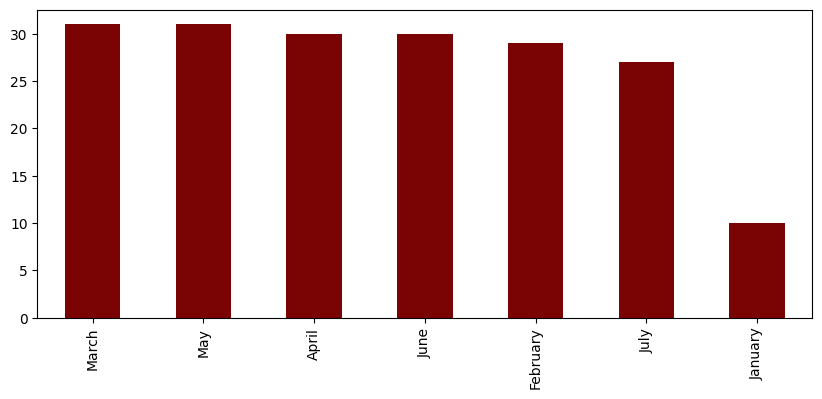

In [50]:
data_india_total.month.value_counts().plot.bar(figsize=(10,4), cmap='turbo_r');

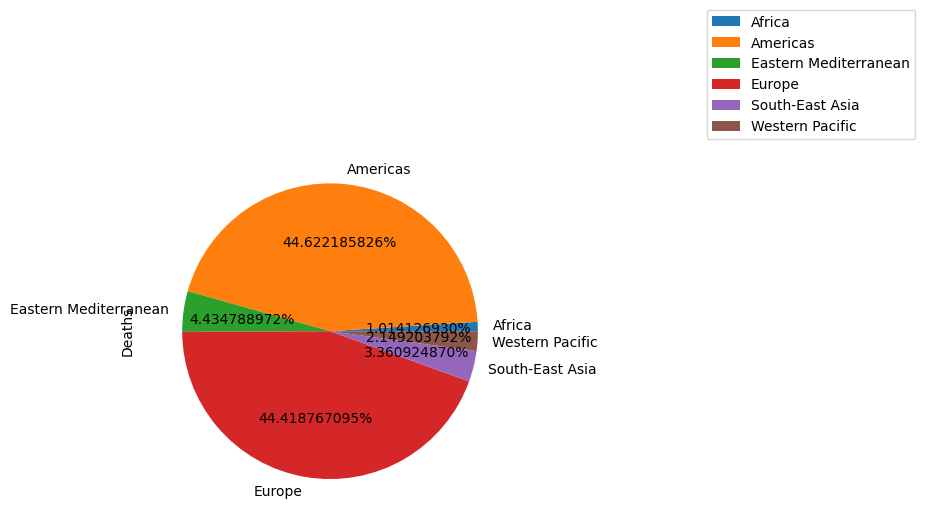

In [51]:
death_rate_region=data.groupby('WHO_Region')['Deaths'].sum()

death_rate_region.plot.pie(autopct = '%7.9f%%')
plt.legend(bbox_to_anchor=(1.5,1),loc='lower left')
plt.show()

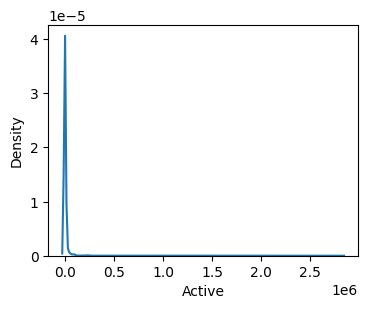

In [56]:
plt.figure(figsize=(4,3))
sns.kdeplot(data=data.Active)
plt.show()

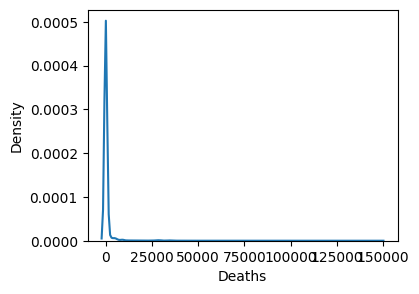

In [57]:
plt.figure(figsize=(4,3))
sns.kdeplot(data=data.Deaths)
plt.show()

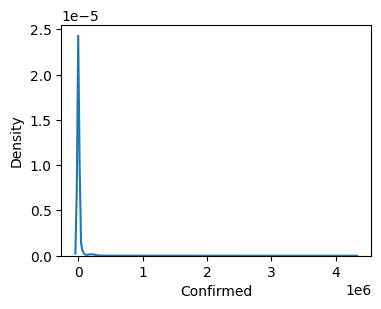

In [58]:
plt.figure(figsize=(4,3))
sns.kdeplot(data=data.Confirmed)
plt.show()